In [1]:
#Imports
import matplotlib.pyplot as plt

In [6]:
#Define input parameters
STATIC_FILE= "static.txt"
DINAMIC_FILE= "dinamic.txt"
NEIGHBORS_FILE= "output.txt"
PARTICLE_SELECTED= 24

In [3]:
#Create auxiliary classes
class Particle:
  def __init__(self, r, rc):
    self.r = r
    self.rc = rc
    
class Point:
  def __init__(self, x, y):
    self.x= x
    self.y= y
    
class Circle:
  def __init__(self, r, x, y):
    self.r= r
    self.x= x
    self.y= y

In [5]:
#Open dinamic and static files
static = open("../resources/" + STATIC_FILE, "r")
dinamic = open("../resources/" + DINAMIC_FILE, "r")

n= int(static.readline()) #First line N
l= int(static.readline()) #Second line L
dinamic.readline() #First line is time

partSizes= static.readlines()
partPos= dinamic.readlines()

particles= []
particleCoord= []

for line in partSizes:
    r, rc= line.split("\t")
    particles.append(Particle(float(r), float(rc)))

for line in partPos:
    x, y= line.split("\t")
    particleCoord.append(Point(float(x), float(y)))

In [8]:
#Open neighbors file
neighborsFile = open("../resources/" + NEIGHBORS_FILE, "r")

neighborsLines= neighborsFile.readlines()
neighborsAux= []
neighbors= []

#Split the selected line to get all neighbors
neighborsAux.append(neighborsLines[PARTICLE_SELECTED].split(" "))


for neig in neighborsAux[0]:
    try:
        neighbors.append(int(neig)) #Particle's neighbors are stored in neighbors array
    except: SyntaxError #Ignore the '\n'

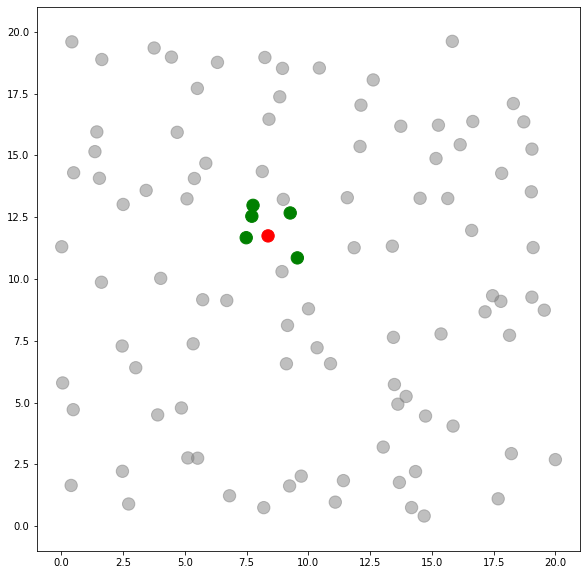

In [10]:
#Create the image
plt.figure(figsize=(10,10))
plt.axis([0, l, 0, l])
plt.axis('square')

circles= []

for i in range(n):
    particleColor= 'gray'
    transparency= 0.5
    if i in neighbors:
        particleColor= 'green'
        transparency= 1
    if i == PARTICLE_SELECTED:
        particleColor= 'red'
        transparency= 1
    circles.append(plt.Circle((particleCoord[i].x, particleCoord[i].y), radius=particles[i].r, color=particleColor, alpha=transparency))
    plt.gca().add_artist(circles[i])